In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Sample-Superstore.csv', encoding='ISO-8859-1')

In [3]:
df.shape

(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [9]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [10]:
df['Postal Code'].nunique()

631

In [11]:
sns.set_theme()
sns.set_style('darkgrid')
sns.set(rc={
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.titlepad': 10,
    'xtick.labelsize': 10,
    'xtick.color': 'grey',
    'ytick.labelsize': 10,
    'ytick.color': 'grey',
    'axes.titlecolor': 'black',
    "figure.dpi":100, 
    'savefig.dpi':200,
    }) 

In [112]:
df['weekday'] = df['Order Date'].dt.strftime('%A')
df['year'] = df['Order Date'].dt.year
df['quarter'] = df['Order Date'].dt.quarter
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekdays, ordered=True)

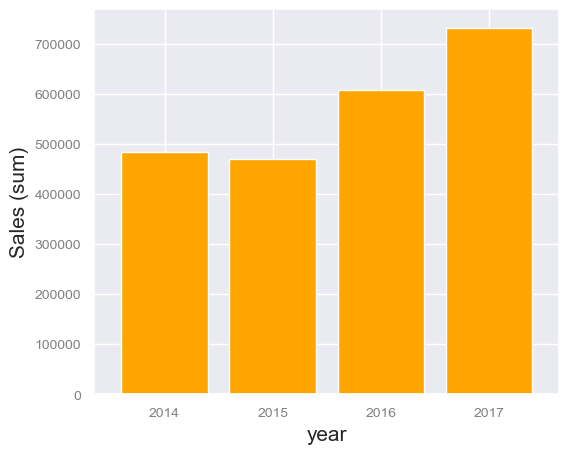

In [141]:
fig, ax = plt.subplots(figsize=(6, 5))

days = df.groupby(df['year'])
days['Sales'].sum().plot(kind='bar', width=0.8, color='orange', x=weekdays)
ax.set_ylabel('Sales (sum)')
plt.xticks(rotation=0)
plt.show()

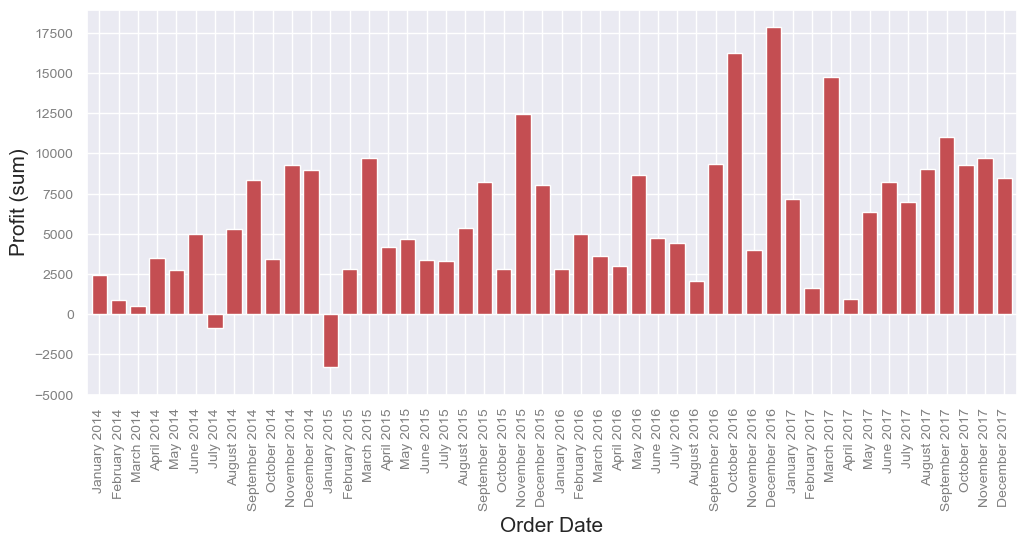

In [95]:
fig, ax = plt.subplots(figsize=(12, 5))

months = df.groupby(pd.Grouper(key="Order Date", freq='M'))
months['Profit'].sum().plot(kind='bar', width=0.8, color='r')
xlabels = [m.strftime('%B %Y') for m, g in months]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
ax.set_yticks(np.arange(-5000, 20000, 2500))
ax.set_ylabel('Profit (sum)')
plt.show()

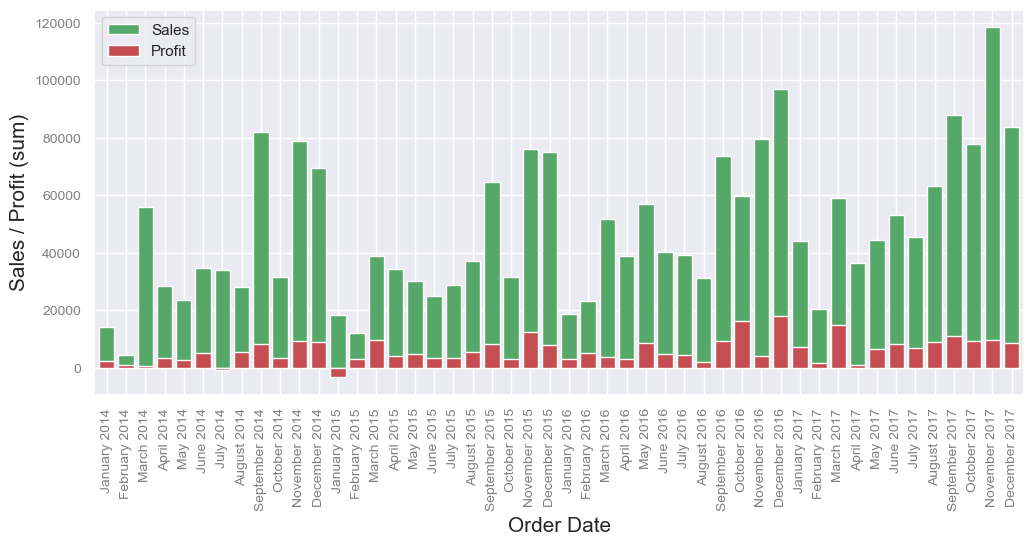

In [100]:
fig, ax = plt.subplots(figsize=(12, 5))

months = df.groupby(pd.Grouper(key="Order Date", freq='M'))
months['Sales'].sum().plot(kind='bar', width=0.8, color='g')
months['Profit'].sum().plot(kind='bar', width=0.8, color='r')
xlabels = [m.strftime('%B %Y') for m, g in months]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
ax.set_ylabel('Sales / Profit (sum)')
plt.legend()
plt.show()

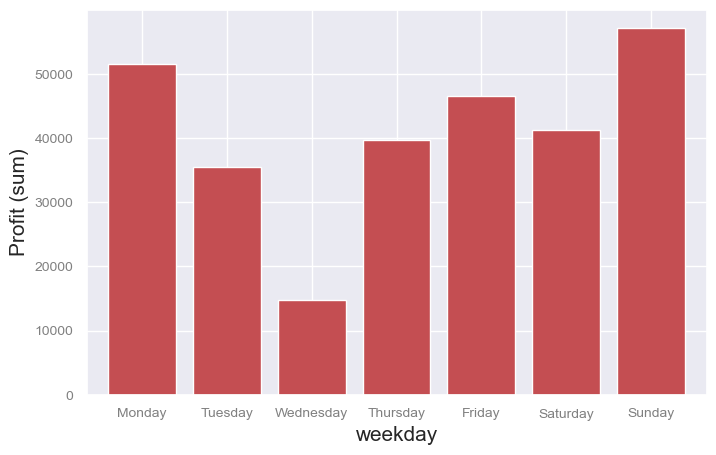

In [140]:
fig, ax = plt.subplots(figsize=(8, 5))

days = df.groupby(df['weekday'])
days['Profit'].sum().plot(kind='bar', width=0.8, color='r', x=weekdays)
ax.set_ylabel('Profit (sum)')
plt.xticks(rotation=0)
plt.show()

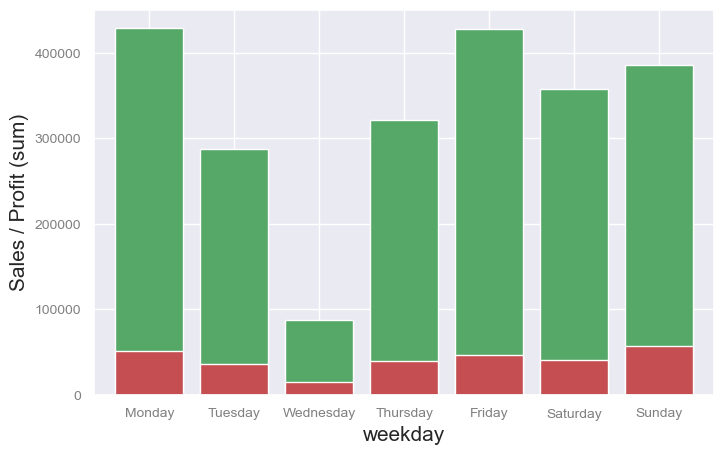

In [139]:
fig, ax = plt.subplots(figsize=(8, 5))

days = df.groupby(df['weekday'])
days['Sales'].sum().plot(kind='bar', width=0.8, color='g', x=weekdays)
days['Profit'].sum().plot(kind='bar', width=0.8, color='r', x=weekdays)
ax.set_ylabel('Sales / Profit (sum)')
plt.xticks(rotation=0)
plt.show()

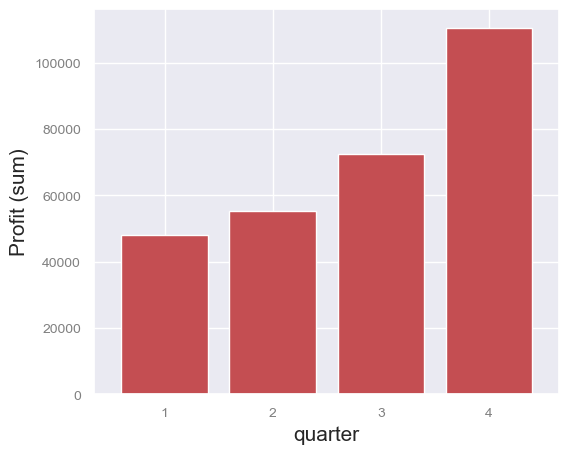

In [138]:
fig, ax = plt.subplots(figsize=(6, 5))

quarters = df.groupby(df['quarter'])
quarters['Profit'].sum().plot(kind='bar', width=0.8, color='r')
ax.set_ylabel('Profit (sum)')
plt.xticks(rotation=0)
plt.show()

In [132]:
df['Net Profit Margin'] = df['Profit']/df['Sales']*100

<Axes: xlabel='weekday'>

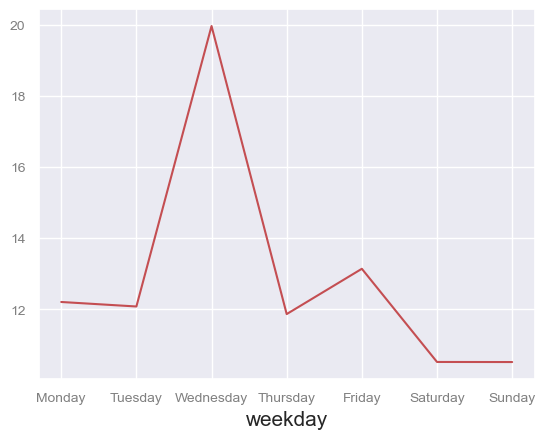

In [136]:
df.groupby(df['weekday'])['Net Profit Margin'].mean().plot(kind='line', color='r')

In [14]:
for cat in df['Category'].unique():
    print(cat)
    print(df[df['Category'] == cat ]['Sub-Category'].unique(), '\n')

Furniture
['Bookcases' 'Chairs' 'Tables' 'Furnishings'] 

Office Supplies
['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies'] 

Technology
['Phones' 'Accessories' 'Machines' 'Copiers'] 



In [15]:
import math
math.comb(64, 10)

151473214816

In [16]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [18]:
df['Product Name'].nunique()

1850

In [19]:
df.shape

(9994, 21)

In [20]:
df['Order ID'].nunique()

5009

In [21]:
df.loc[df['Order ID'] == 'CA-2015-103135']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6497,6498,CA-2015-103135,2015-07-24,2015-07-28,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,...,40214,South,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,20.94,3,0.0,6.0726
6498,6499,CA-2015-103135,2015-07-24,2015-07-28,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,...,40214,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",135.09,9,0.0,62.1414
6499,6500,CA-2015-103135,2015-07-24,2015-07-28,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,...,40214,South,TEC-AC-10003289,Technology,Accessories,Anker Ultra-Slim Mini Bluetooth 3.0 Wireless K...,279.86,14,0.0,64.3678
6500,6501,CA-2015-103135,2015-07-24,2015-07-28,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,...,40214,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",90.06,6,0.0,41.4276


In [22]:
df['Cost'] = round((df['Sales'] - df['Profit'])/df['Quantity'], 4)

In [23]:
df['Sell Price'] = round(df['Sales']/((1 - df['Discount'])*df['Quantity']), 4)

In [24]:
date_count = df.groupby('Order ID')['Ship Date'].nunique()
print(date_count[date_count > 1].count())

0


In [25]:
order_id_count = df.groupby(['Order ID', 'Product ID'])['Sales'].nunique()
order_id_count[order_id_count > 1]

Order ID        Product ID     
CA-2015-103135  OFF-BI-10000069    2
CA-2016-129714  OFF-PA-10001970    2
CA-2016-137043  FUR-FU-10003664    2
CA-2016-140571  OFF-PA-10001954    2
CA-2017-118017  TEC-AC-10002006    2
CA-2017-152912  OFF-ST-10003208    2
US-2016-123750  TEC-AC-10004659    2
Name: Sales, dtype: int64

In [26]:
discounts_count = df.groupby('Order ID')['Discount'].nunique()
print(discounts_count[discounts_count > 1].count())

1211


In [27]:
# Some products vary in price

prices_count = df.groupby('Product ID')['Cost'].nunique()
print(prices_count[prices_count > 1].count())

32


In [28]:
b = df.groupby('Product Name')['Cost'].nunique()
b[b >= 2]

Product Name
Avery Non-Stick Binders         2
Easy-staple paper               8
Eldon Wave Desk Accessories     2
KI Adjustable-Height Table      2
Prang Drawing Pencil Set        2
Staple envelope                 9
Staple holder                   3
Staple magnet                   2
Staple remover                  3
Staple-based wall hangings      2
Staples                        10
Staples in misc. colors         7
Storex Dura Pro Binders         2
Name: Cost, dtype: int64

In [29]:
a = df.groupby(['Product Name', 'Cost'])['Cost'].nunique()
a[a >= 2]

Series([], Name: Cost, dtype: int64)

In [30]:
a = df.groupby(['Customer ID'])['Customer Name'].nunique()
a[a > 1]

Series([], Name: Customer Name, dtype: int64)

In [31]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Cost',
       'Sell Price'],
      dtype='object')

In [32]:
df[['Order ID', 'Country', 'Order Date', 'Postal Code']]

,Order ID,Country,Order Date,Postal Code
0,CA-2016-152156,United States,2016-11-08,42420
1,CA-2016-152156,United States,2016-11-08,42420
2,CA-2016-138688,United States,2016-06-12,90036
3,US-2015-108966,United States,2015-10-11,33311
4,US-2015-108966,United States,2015-10-11,33311
...,...,...,...,...
9989,CA-2014-110422,United States,2014-01-21,33180
9990,CA-2017-121258,United States,2017-02-26,92627
9991,CA-2017-121258,United States,2017-02-26,92627
9992,CA-2017-121258,United States,2017-02-26,92627


In [33]:
df.groupby('Order ID')['Sales'].sum()

Order ID
CA-2014-100006     377.970
CA-2014-100090     699.192
CA-2014-100293      91.056
CA-2014-100328       3.928
CA-2014-100363      21.376
                    ...   
US-2017-168802      18.368
US-2017-169320     171.430
US-2017-169488      56.860
US-2017-169502     113.410
US-2017-169551    1344.838
Name: Sales, Length: 5009, dtype: float64

In [34]:
df['Product ID'].nunique()

1862

In [35]:
df['Sub-Category'].nunique()

17

In [36]:
df[df['Product Name'] == 'netTALK DUO VoIP Telephone Service']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Sell Price
68,69,CA-2014-106376,2014-12-05,2014-12-10,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,167.968,4,0.2,62.988,26.245,52.49
1612,1613,CA-2014-156349,2014-05-26,2014-05-30,Standard Class,ML-17395,Marina Lichtenstein,Corporate,United States,Los Angeles,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,83.984,2,0.2,31.494,26.245,52.49
1672,1673,CA-2017-111647,2017-07-03,2017-07-07,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Plano,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,167.968,4,0.2,62.988,26.245,52.49
1696,1697,CA-2015-156335,2015-09-25,2015-09-28,Second Class,PO-19195,Phillina Ober,Home Office,United States,Bayonne,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,104.980,2,0.0,52.490,26.245,52.49
2744,2745,CA-2015-140144,2015-06-20,2015-06-25,Second Class,SC-20770,Stewart Carmichael,Corporate,United States,San Francisco,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,125.976,3,0.2,47.241,26.245,52.49
3209,3210,CA-2016-108882,2016-01-09,2016-01-15,Standard Class,LA-16780,Laura Armstrong,Corporate,United States,Fresno,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,377.928,9,0.2,141.723,26.245,52.49
3352,3353,US-2014-134733,2014-09-23,2014-09-28,Standard Class,BM-11650,Brian Moss,Corporate,United States,San Diego,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,83.984,2,0.2,31.494,26.245,52.49


In [37]:
df['Product Name'].nunique()

1850

In [38]:
df[df['Product Name'] == 'Staples']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Sell Price
132,133,US-2017-164147,2017-02-02,2017-02-05,First Class,DW-13585,Dorothy Wardle,Corporate,United States,Columbus,...,OFF-FA-10002780,Office Supplies,Fasteners,Staples,21.456,9,0.2,6.9732,1.6092,2.98
342,343,CA-2014-122336,2014-04-13,2014-04-17,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,Philadelphia,...,OFF-FA-10002780,Office Supplies,Fasteners,Staples,30.992,13,0.2,10.0724,1.6092,2.98
525,526,CA-2015-158792,2015-12-26,2016-01-02,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,Lawrence,...,OFF-FA-10002815,Office Supplies,Fasteners,Staples,22.200,5,0.0,10.4340,2.3532,4.44
646,647,CA-2016-103947,2016-04-01,2016-04-08,Standard Class,BB-10990,Barry Blumstein,Corporate,United States,Sierra Vista,...,OFF-FA-10003112,Office Supplies,Fasteners,Staples,31.560,5,0.2,9.8625,4.3395,7.89
1108,1109,US-2016-110156,2016-11-19,2016-11-24,Standard Class,EH-13945,Eric Hoffmann,Consumer,United States,Houston,...,OFF-FA-10003495,Office Supplies,Fasteners,Staples,58.368,12,0.2,21.8880,3.0400,6.08
1147,1148,CA-2015-112452,2015-04-04,2015-04-04,Same Day,NC-18340,Nat Carroll,Consumer,United States,Lansing,...,OFF-FA-10000735,Office Supplies,Fasteners,Staples,5.840,2,0.0,2.6280,1.6060,2.92
1485,1486,CA-2014-119032,2014-11-27,2014-12-03,Standard Class,MS-17770,Maxwell Schwartz,Consumer,United States,New York City,...,OFF-FA-10003021,Office Supplies,Fasteners,Staples,3.760,2,0.0,1.3160,1.2220,1.88
1642,1643,US-2014-134712,2014-11-29,2014-12-04,Standard Class,BS-11380,Bill Stewart,Corporate,United States,Skokie,...,OFF-FA-10003112,Office Supplies,Fasteners,Staples,12.624,2,0.2,3.9450,4.3395,7.89
1703,1704,CA-2014-139857,2014-02-02,2014-02-06,Standard Class,CD-12790,Cynthia Delaney,Home Office,United States,San Diego,...,OFF-FA-10001843,Office Supplies,Fasteners,Staples,12.350,5,0.0,5.8045,1.3091,2.47
1886,1887,CA-2014-140165,2014-05-13,2014-05-15,First Class,EH-14005,Erica Hernandez,Home Office,United States,Hialeah,...,OFF-FA-10002815,Office Supplies,Fasteners,Staples,7.104,2,0.2,2.3976,2.3532,4.44


In [39]:
df['Product ID'].nunique()

1862

In [40]:
df['Product Name'].nunique()

1850

In [41]:
# One address can have multiple customers

user_counts = df.groupby('Postal Code')['Customer ID'].nunique()
print(user_counts[user_counts > 1])


Postal Code
1453      2
1841     15
1852      7
2038      9
2138      3
         ..
98502     3
98632     2
98661     3
99207     5
99301     2
Name: Customer ID, Length: 488, dtype: int64


In [42]:
# One customer can have multiple addresses

user_address_counts = df.groupby('Customer ID')['Postal Code'].nunique()
users_with_different_addresses = user_address_counts[user_address_counts > 1]
print(users_with_different_addresses)

Customer ID
AA-10315     5
AA-10375     9
AA-10480     4
AA-10645     6
AB-10015     3
            ..
XP-21865    11
YC-21895     5
YS-21880     8
ZC-21910    13
ZD-21925     5
Name: Postal Code, Length: 780, dtype: int64


In [43]:
# # Connecting with PostgreSQL Database

# import psycopg

# with psycopg.connect('dbname=test user=postgres password=postgresql') as conn:

#     with conn.cursor() as cur:

#         # cur.execute("""
#         #     CREATE TABLE IF NOT EXISTS table1 (
#         #         id text PRIMARY KEY,
#         #         num integer,
#         #         data text)
#         #     """)
#         cur.execute("DROP TABLE table1")

#         cur.execute("""
#             CREATE TABLE IF NOT EXISTS table1 (
#                 id varchar(20) PRIMARY KEY,
#                 name text)
#             """)
        
#         for cust in c:
#             cur.execute(
#                 "INSERT INTO table1 (id, name) VALUES (%s, %s)",
#                 (cust[0], cust[1]))

#         # cur.execute("DELETE FROM table1")
        
#         cur.execute("SELECT * FROM table1")
#         cur.fetchone()

#         for record in cur:
#             print(record)